<a href="https://www.kaggle.com/code/quratulain20/polynomial-regression?scriptVersionId=192748380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/manufacturing-data-for-polynomial-regression/manufacturing.csv")

In [3]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [4]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
X

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06
...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06


In [7]:
y

0        99.999971
1        99.985703
2        99.999758
3        99.999975
4       100.000000
           ...    
3952    100.000000
3953     99.999997
3954     99.989318
3955     99.999975
3956    100.000000
Name: Quality Rating, Length: 3957, dtype: float64

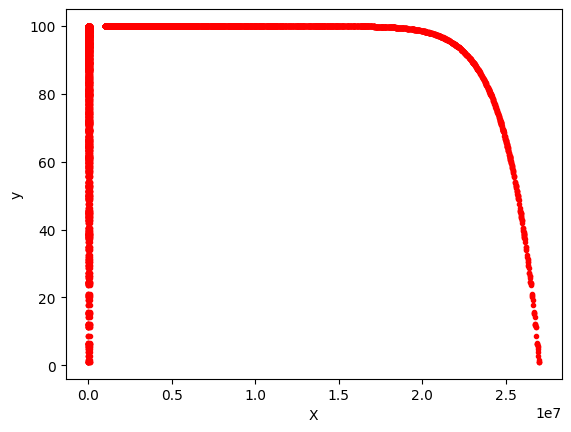

In [8]:
plt.plot(X, y, 'r.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.5145614193853506

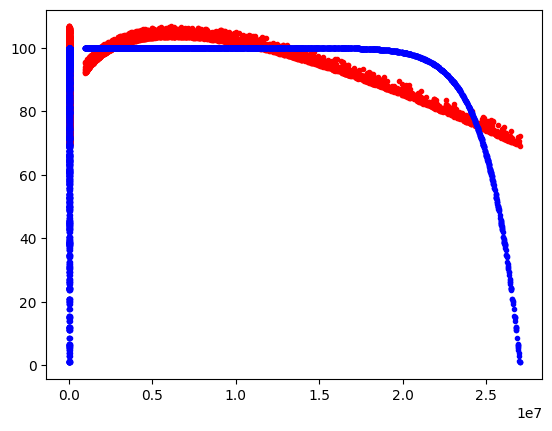

In [13]:
plt.plot(X_train,lr.predict(X_train),'r.')
plt.plot(X,y, 'b.')
plt.show()

# Applying Polynomial regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures , StandardScaler

In [15]:
poly = PolynomialFeatures(degree=2 , include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [16]:
X_train_trans.shape

(3165, 21)

In [17]:
X_train.shape

(3165, 5)

In [18]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [19]:
X_test_trans.shape

(792, 21)

In [20]:
y_pred = lr.predict(X_test_trans)

In [21]:
r2_score(y_test,y_pred)

0.9142799370224143

In [22]:
lr.coef_

array([ 0.00000000e+00, -3.81505809e+01,  2.69385958e+00, -5.33133293e-02,
       -2.66010272e-02, -2.21157291e-03,  4.45674937e-01, -5.33060048e-02,
        3.58552805e-04,  1.00418902e-04,  4.44840105e-06,  4.03219742e-01,
       -1.55409158e-03,  5.68160284e-04, -2.64059766e-06,  2.79569813e-06,
       -6.17113292e-07,  4.05366882e-09, -1.47998630e-07,  3.73908321e-10,
       -8.77520279e-12])

In [23]:
X_train_trans.shape

(3165, 21)